In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from newdust.graindist import composition

In [3]:
ENERGY = np.logspace(-1, 1, 100)
LAMBDA = np.logspace(0.0, 1.5, 100)

In [4]:
dtest = composition.CmDrude()

[]

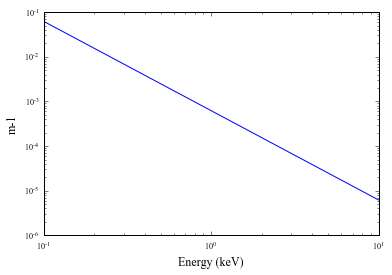

In [5]:
ax = plt.subplot(111)
dtest.plot(ax, ENERGY)
plt.loglog()

[]

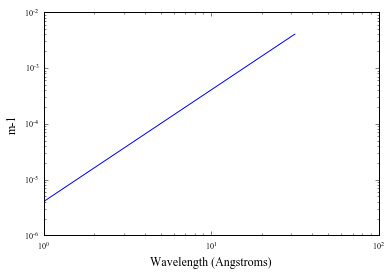

In [6]:
ax = plt.subplot(111)
dtest.plot(ax, LAMBDA, unit='angs')
plt.loglog()

In [7]:
stest = composition.CmSilicate()

[]

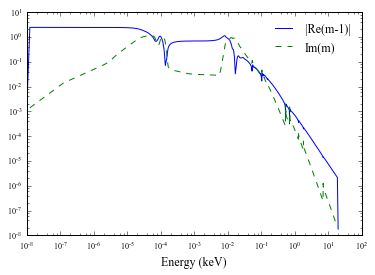

In [8]:
ax = plt.subplot(111)
stest.plot(ax)
plt.loglog()

[]

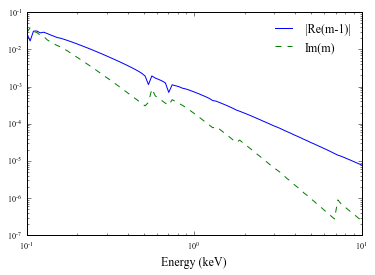

In [9]:
ax = plt.subplot(111)
stest.plot(ax, lam=ENERGY)
plt.loglog()

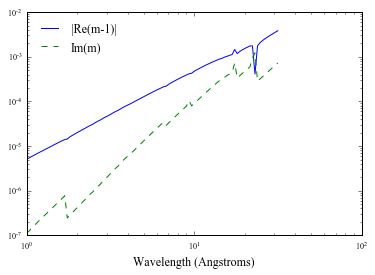

In [11]:
ax = plt.subplot(111)
stest.plot(ax, lam=LAMBDA, unit='angs')
plt.loglog()
plt.legend(loc='upper left', frameon=False)